<a href="https://colab.research.google.com/github/kidrah-git/-Data-Visualisation-/blob/Visulatization/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
file_path ='/content/drive/MyDrive/paralympics dataset /paralympics_2024_medal_table.csv'  # Adjust path if needed
data = pd.read_csv(file_path)

In [ ]:
print("Dataset Overview:")
print(f"Shape: {data.shape}")
print("\nColumns:\n", data.columns)
print("\nData Types:\n", data.dtypes)
print("\nFirst 5 rows:\n", data.head())
print("\nMissing Values:\n", data.isnull().sum())

Dataset Overview:
Shape: (69, 6)

Columns:
 Index(['Rank', 'Country', 'Gold', 'Silver', 'Bronze', 'Total'], dtype='object')

Data Types:
 Rank       object
Country    object
Gold        int64
Silver      int64
Bronze      int64
Total       int64
dtype: object

First 5 rows:
   Rank                      Country  Gold  Silver  Bronze  Total
0    1                        China    94      76      50    220
1    2                Great Britain    49      44      31    124
2    3                United States    36      42      27    105
3    4                  Netherlands    27      17      12     56
4    –  Neutral Paralympic Athletes    26      22      23     71

Missing Values:
 Rank       0
Country    0
Gold       0
Silver     0
Bronze     0
Total      0
dtype: int64


In [ ]:
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
            Gold     Silver     Bronze       Total
count  69.000000  69.000000  69.000000   69.000000
mean    7.826087   7.826087   8.565217   24.217391
std    14.011504  12.362130  10.826816   35.933300
min     0.000000   0.000000   0.000000    1.000000
25%     1.000000   1.000000   2.000000    5.000000
50%     3.000000   3.000000   4.000000   10.000000
75%     7.000000   9.000000  12.000000   28.000000
max    94.000000  76.000000  50.000000  220.000000


In [ ]:
print("\nDuplicate Rows:", data.duplicated().sum())


Duplicate Rows: 0


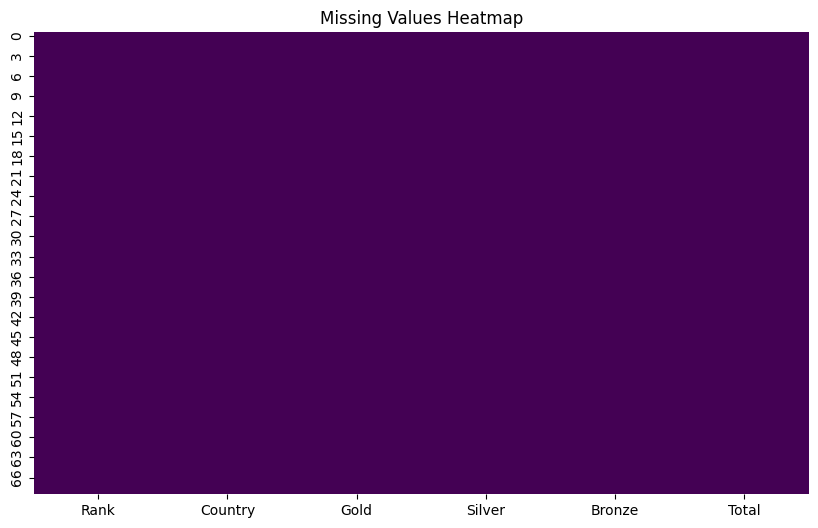

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
data = data.replace('–', np.nan)  # Replace dashes with NaN
data = data.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, coerce errors to NaN
data = data.fillna(0)  # Optionally, fill NaNs with 0 or use .dropna() to remove rows/columns with NaNs


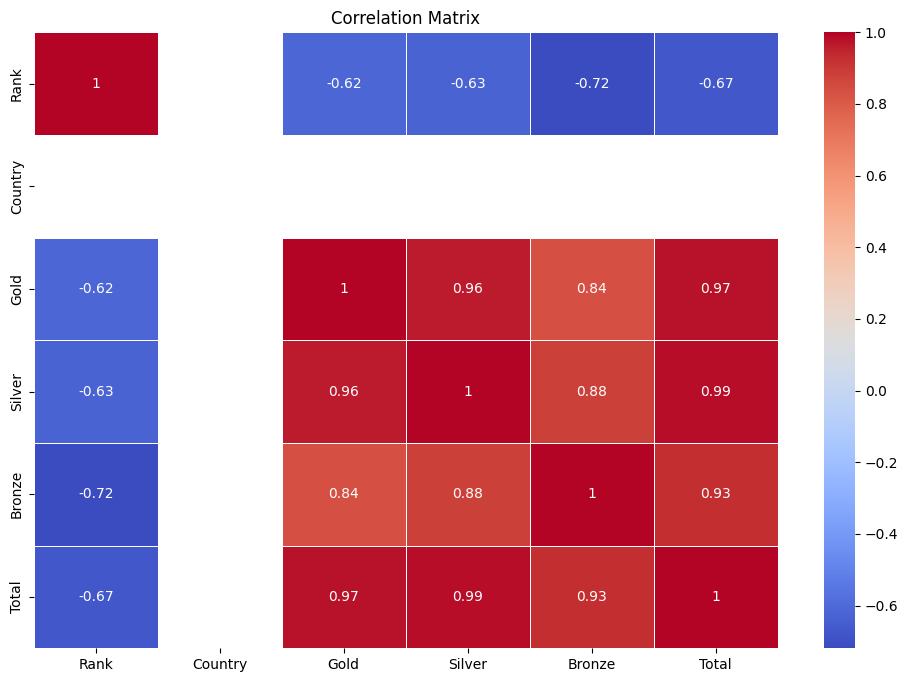

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

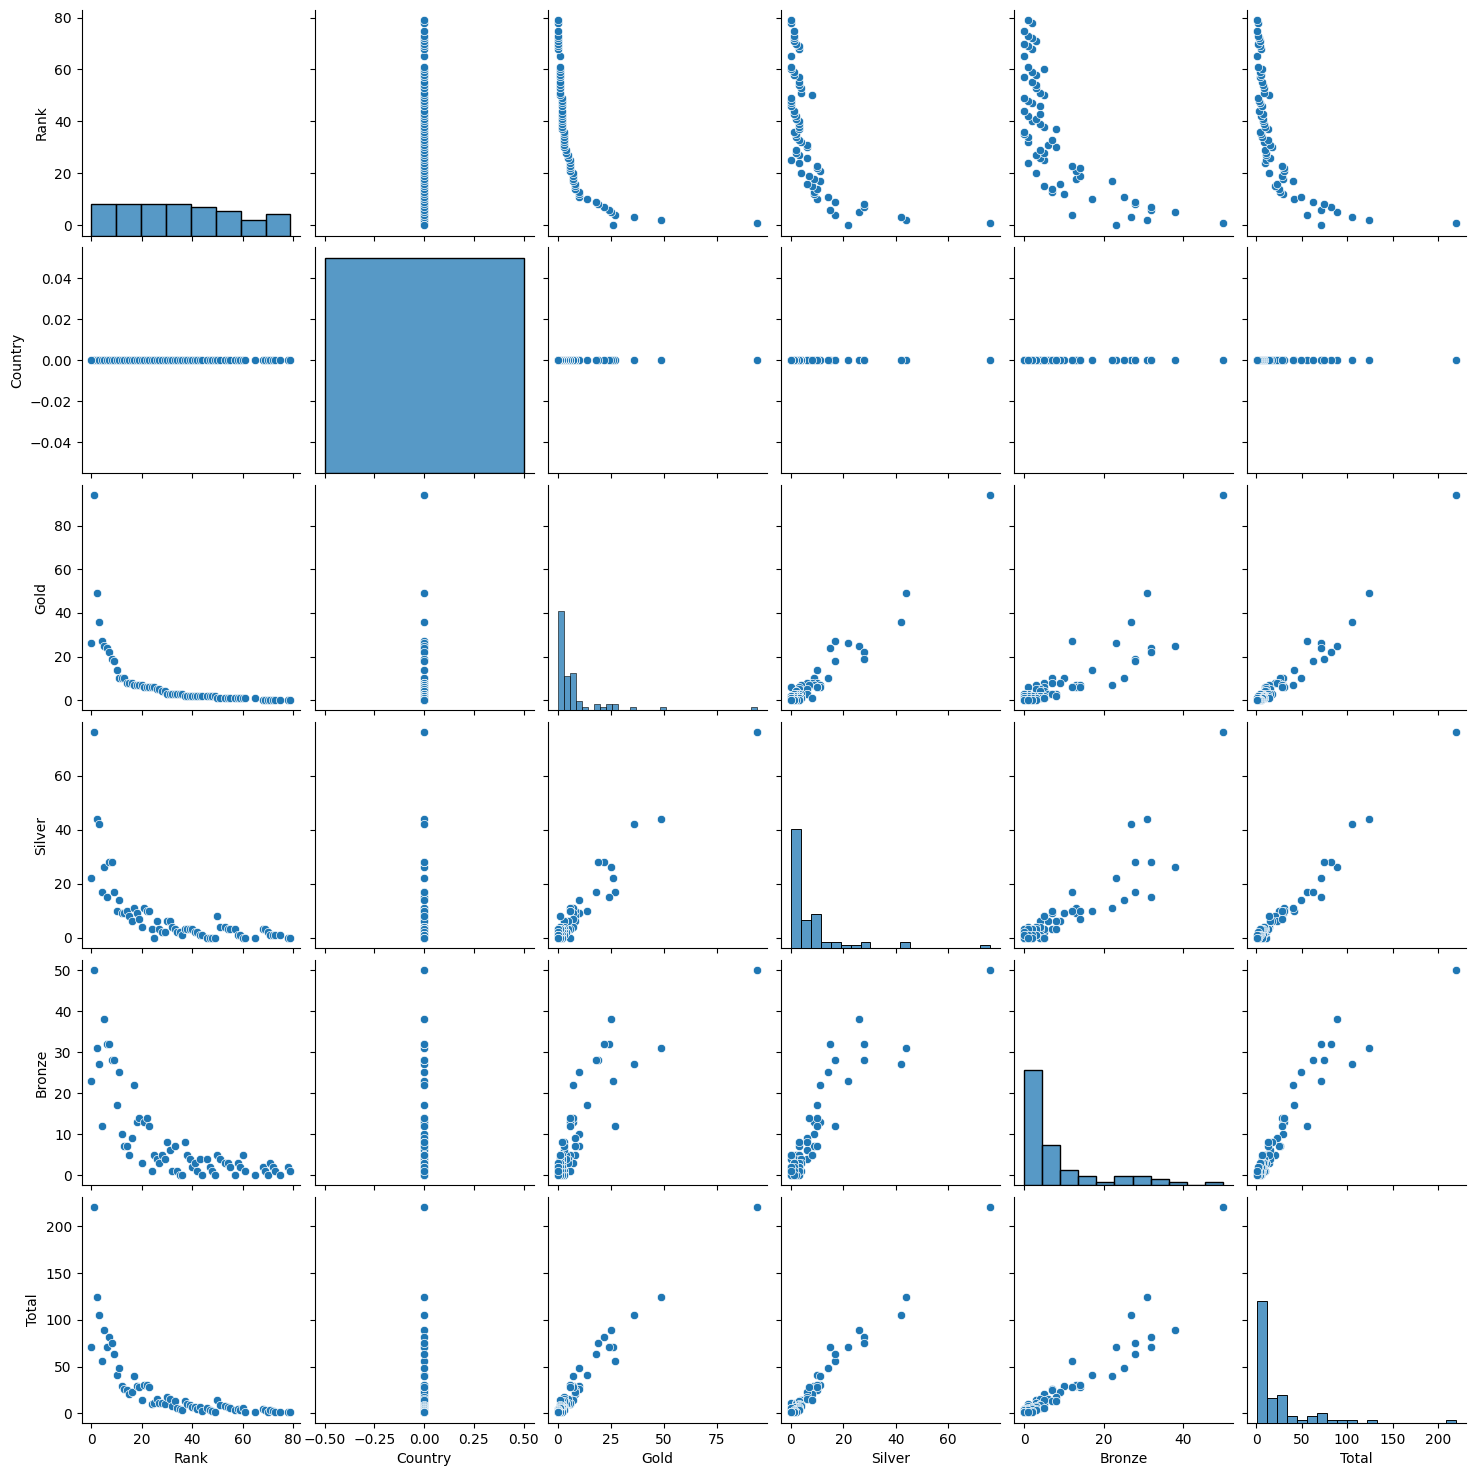

In [ ]:
sns.pairplot(data)
plt.show()

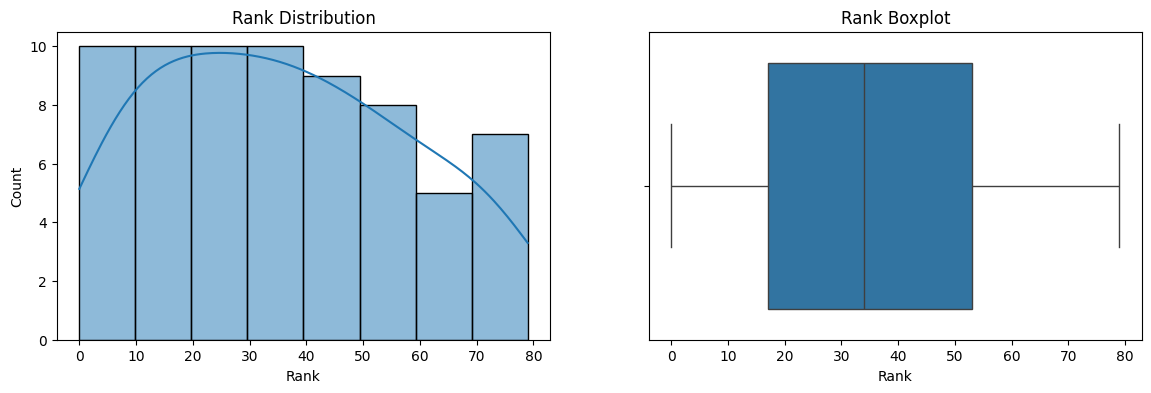

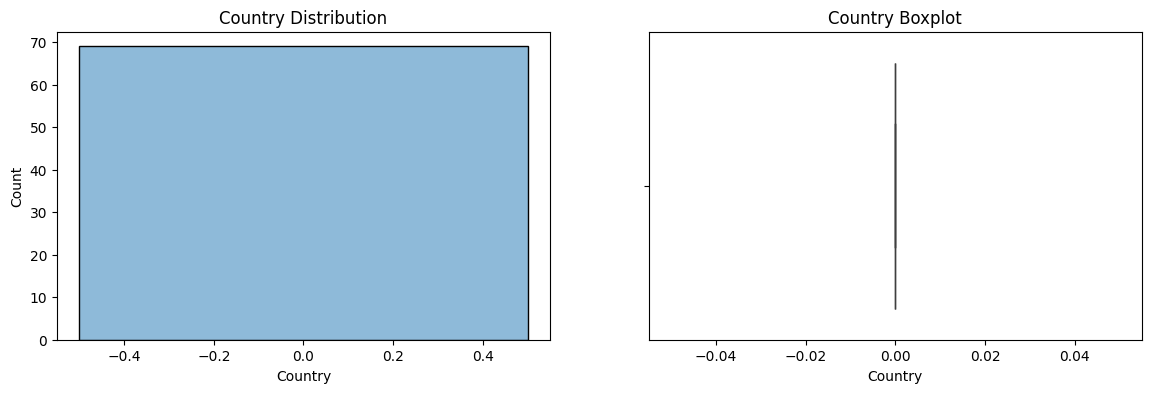

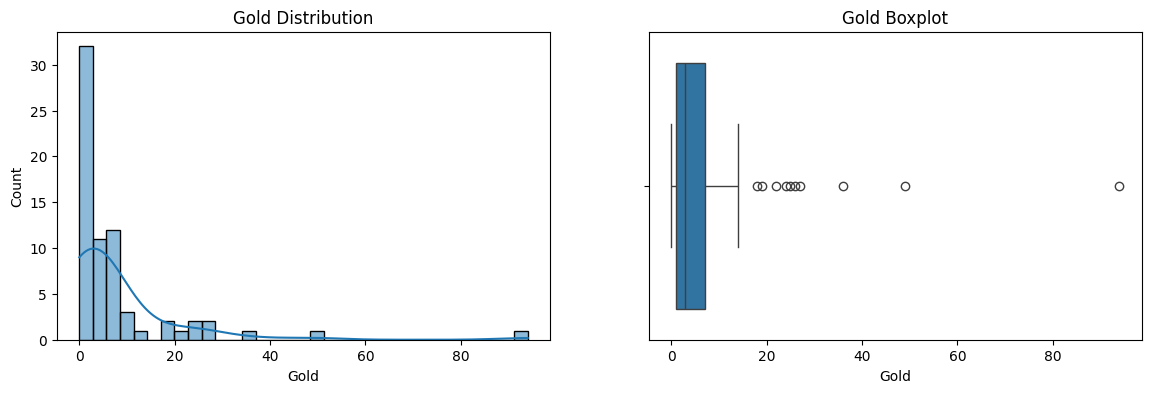

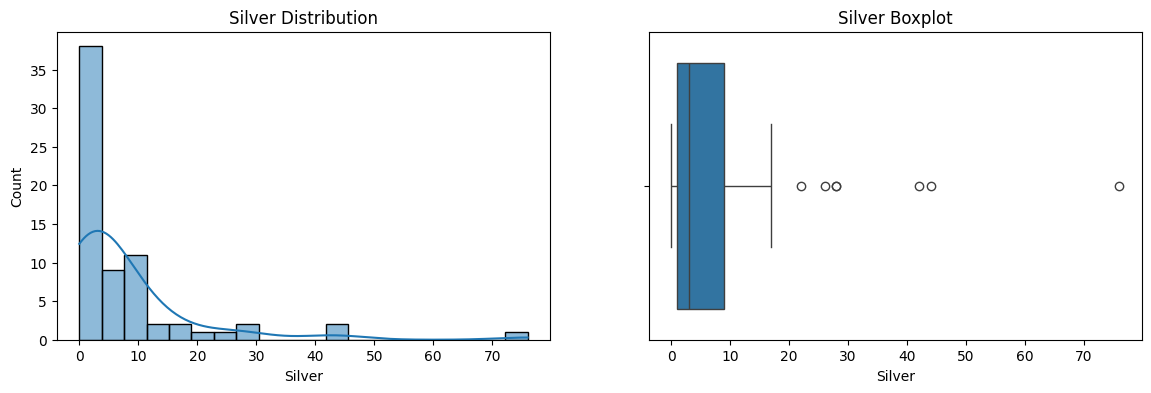

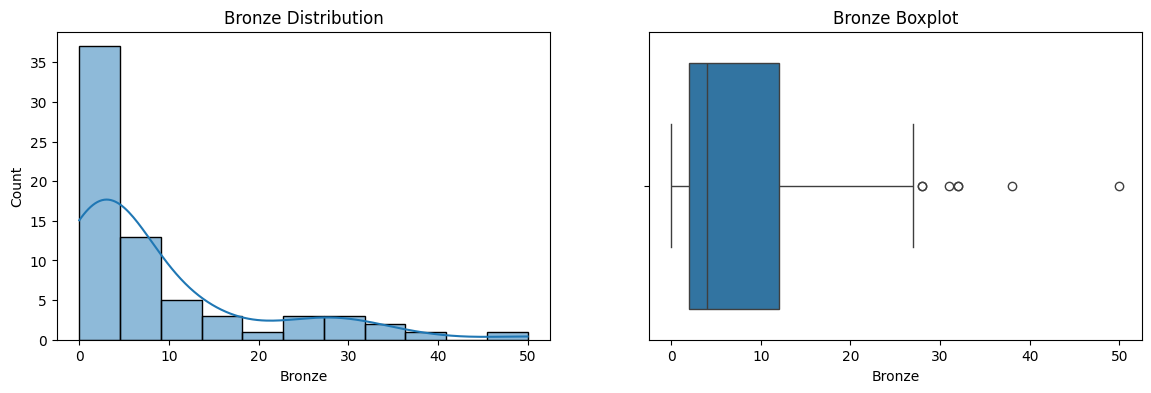

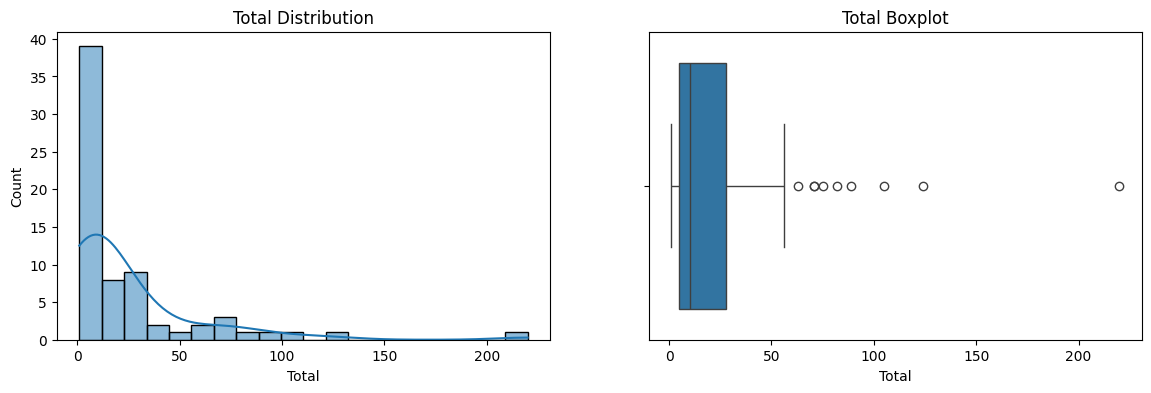

In [ ]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'{col} Boxplot')
    plt.show()

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'{col} Count Plot')
    plt.show()


In [ ]:
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))]
    print(f"\nOutliers in {col}:")
    print(outliers)


Outliers in Rank:
Empty DataFrame
Columns: [Rank, Country, Gold, Silver, Bronze, Total]
Index: []

Outliers in Country:
Empty DataFrame
Columns: [Rank, Country, Gold, Silver, Bronze, Total]
Index: []

Outliers in Gold:
   Rank  Country  Gold  Silver  Bronze  Total
0   1.0      0.0    94      76      50    220
1   2.0      0.0    49      44      31    124
2   3.0      0.0    36      42      27    105
3   4.0      0.0    27      17      12     56
4   0.0      0.0    26      22      23     71
5   5.0      0.0    25      26      38     89
6   6.0      0.0    24      15      32     71
7   7.0      0.0    22      28      32     82
8   8.0      0.0    19      28      28     75
9   9.0      0.0    18      17      28     63

Outliers in Silver:
   Rank  Country  Gold  Silver  Bronze  Total
0   1.0      0.0    94      76      50    220
1   2.0      0.0    49      44      31    124
2   3.0      0.0    36      42      27    105
4   0.0      0.0    26      22      23     71
5   5.0      0.0    25 

In [ ]:
print("\nInsights and Observations:")


Insights and Observations:
